In [1]:
import pandas as pd
import glob, os
import matplotlib.pyplot as plt

In [2]:
# %matplotlib qt
%matplotlib inline

def visualize_validation_perplexity(files):
    logs = []
    plt.figure(figsize=(12,7))
    for file in files:
        exp_id = file.split('.')[0][7:]
        x = pd.read_csv(file)
        best_ppl = round(min(x['ppl']), 2)

        # plot
        plt.plot(x['epoch'], x['ppl'], label=f"exp {exp_id} (best_ppl={best_ppl})")
        plt.xlabel('epochs', fontsize=14)
        plt.ylabel('perplexity', fontsize=14)
        plt.title('validation perplexity', fontsize=14)
        plt.semilogy()

        # print
        print(f"Experiment {exp_id} - best val ppl={best_ppl}")
        logs.append(x)

    plt.legend(fontsize=14)
    plt.show()

## TT Embedding. varying rank when core=3 and varying core when rank=3

Experiment 5 - best val ppl=8.84
Experiment 6 - best val ppl=7.36
Experiment 7 - best val ppl=6.92
Experiment 8 - best val ppl=6.87
Experiment 1000 - best val ppl=6.44


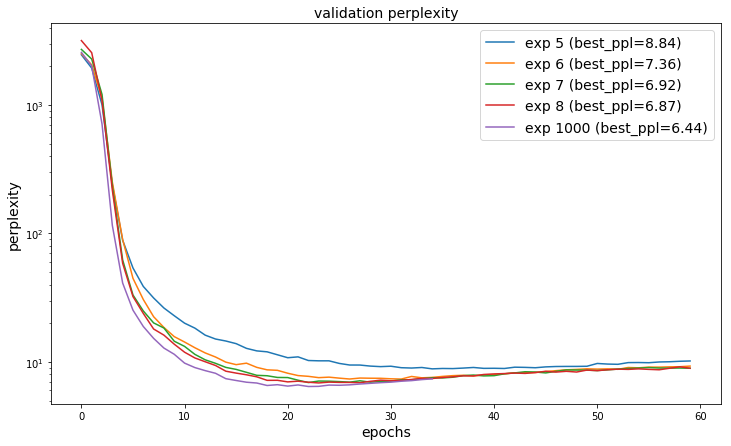

Experiment 9 - best val ppl=10.93
Experiment 10 - best val ppl=7.58
Experiment 11 - best val ppl=6.45
Experiment 12 - best val ppl=6.49
Experiment 13 - best val ppl=6.01
Experiment 14 - best val ppl=5.56
Experiment 15 - best val ppl=5.49
Experiment 16 - best val ppl=5.42
Experiment 17 - best val ppl=5.76
Experiment 18 - best val ppl=5.14


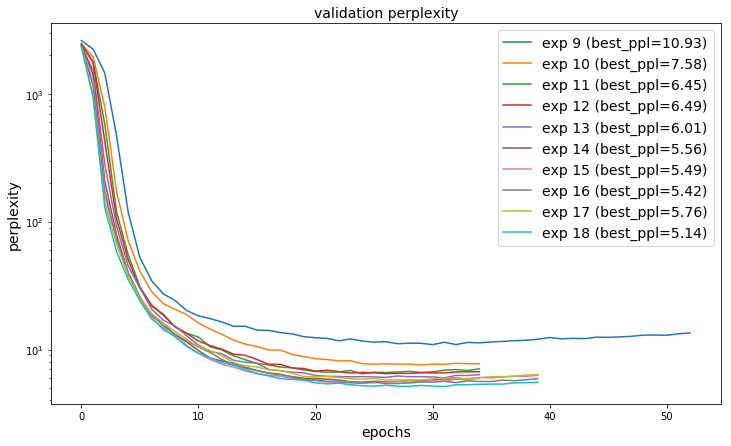

In [45]:
# validation_files = glob.glob("output/*.valid.log")
# visualize_validation_perplexity(validation_files)

rank3_files = [f"output/{exp_id}.valid.log" for exp_id in [5,6,7,8,1000]]
visualize_validation_perplexity(rank3_files)

core3_files = [f"output/{exp_id}.valid.log" for exp_id in [9,10,11,12,13,14,15,16,17,18]]
visualize_validation_perplexity(core3_files)

## TT Embedding varying rank when core=5

Experiment 19 - best val ppl=6.89
Experiment 20 - best val ppl=5.6
Experiment 21 - best val ppl=5.39
Experiment 22 - best val ppl=5.33
Experiment 23 - best val ppl=4.88
Experiment 24 - best val ppl=4.87
Experiment 25 - best val ppl=4.76
Experiment 26 - best val ppl=4.67
Experiment 27 - best val ppl=4.56
Experiment 28 - best val ppl=4.54


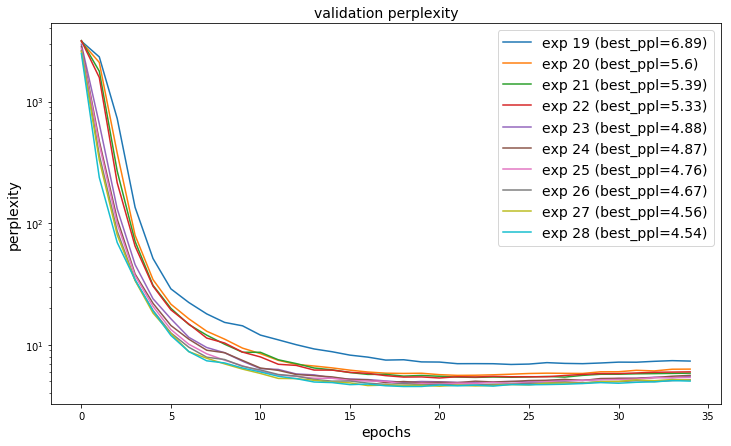

In [46]:
core5_files = [f"output/{exp_id}.valid.log" for exp_id in [19,20,21,22,23,24,25,26,27,28]]
visualize_validation_perplexity(rank4_dmodel512_files)

# Report plots

In [34]:
def plot_rank_and_cores_experiments(exp_data):
    rank_files = exp_data['rank']['files']
    rank_labels = exp_data['rank']['labels']
    core_files = exp_data['core']['files']
    core_labels = exp_data['core']['labels']
    plt.figure(figsize=(13,4))    
    
    plt.subplot(1,2,1)
    for i in range(len(core_files)):
        exp_file = core_files[i]
        exp_label = core_labels[i]
        exp_id = exp_file.split('.')[0][7:]        
        x = pd.read_csv(exp_file)
        best_ppl = round(min(x['ppl']), 2)
        print(f"Experiment {exp_id} - best val ppl={best_ppl}")

        # plot
        plt.plot(x['epoch'], x['ppl'], label=f"{exp_label} (ppl={best_ppl})")
        plt.xlabel('epochs', fontsize=14)
        plt.ylabel('perplexity', fontsize=14)
        plt.title('varying the no of tt cores', fontsize=14)
        plt.semilogy()
        plt.legend(fontsize=14)
    
    plt.subplot(1,2,2)
    for i in range(len(rank_files)):
        exp_file = rank_files[i]
        exp_label = rank_labels[i]
        exp_id = exp_file.split('.')[0][7:]
        x = pd.read_csv(exp_file)
        best_ppl = round(min(x['ppl']), 2)
        print(f"Experiment {exp_id} - best val ppl={best_ppl}")

        # plot
        plt.plot(x['epoch'], x['ppl'], label=f"{exp_label} (ppl={best_ppl})")
        plt.xlabel('epochs', fontsize=14)
        plt.ylabel('perplexity', fontsize=14)
        plt.title('varying the tt-rank', fontsize=14)
        plt.semilogy()
        plt.legend(fontsize=14)    
    plt.show()

## TT-Transformer-Emb Results

{'core': {'files': ['output/2.valid.log', 'output/5.valid.log', 'output/7.valid.log', 'output/1000.valid.log'], 'labels': ['uncompressed', 'c=2, r=3', 'c=4, r=3', 'c=6, r=3']}, 'rank': {'files': ['output/2.valid.log', 'output/1003.valid.log', 'output/1002.valid.log', 'output/1001.valid.log'], 'labels': ['uncompressed', 'c=6, r=8', 'c=6, r=16', 'c=6, r=32']}}
Experiment 2 - best val ppl=4.32
Experiment 5 - best val ppl=8.84
Experiment 7 - best val ppl=6.92
Experiment 1000 - best val ppl=6.44
Experiment 2 - best val ppl=4.32
Experiment 1003 - best val ppl=5.03
Experiment 1002 - best val ppl=4.49
Experiment 1001 - best val ppl=4.34


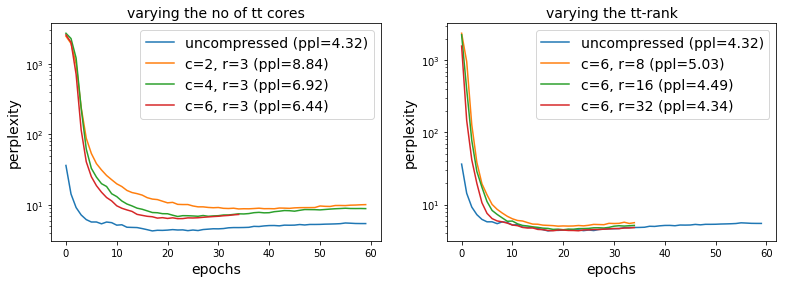

In [68]:
experiments = {
    'core':{
            'files': [f"output/{exp_id}.valid.log" for exp_id in [2,5,7,1000]],
            'labels': ['uncompressed',
                       'c=2, r=3', 
                       'c=4, r=3', 
                       'c=6, r=3',]
    },
    'rank':{
            'files': [f"output/{exp_id}.valid.log" for exp_id in [2,1003,1002,1001]],
            'labels': ['uncompressed',
                       'c=6, r=8', 
                       'c=6, r=16', 
                       'c=6, r=32']
    }
}
print(experiments)
plot_rank_and_cores_experiments(experiments)

## TT-Transformer-PFF Results

{'core': {'files': ['D:/Users/Charley/Desktop/mo/2.valid.log', 'D:/Users/Charley/Desktop/mo/6.valid.log', 'D:/Users/Charley/Desktop/mo/7.valid.log', 'D:/Users/Charley/Desktop/mo/8.valid.log'], 'labels': ['uncompressed', 'c=3, r=3', 'c=4, r=3', 'c=5, r=3']}, 'rank': {'files': ['D:/Users/Charley/Desktop/mo/2.valid.log', 'D:/Users/Charley/Desktop/mo/12.valid.log', 'D:/Users/Charley/Desktop/mo/13.valid.log', 'D:/Users/Charley/Desktop/mo/14.valid.log'], 'labels': ['uncompressed', 'c=3, r=7', 'c=3, r=9', 'c=3, r=11']}}
Experiment s/Charley/Desktop/mo/2 - best val ppl=4.32
Experiment s/Charley/Desktop/mo/6 - best val ppl=4.05
Experiment s/Charley/Desktop/mo/7 - best val ppl=4.02
Experiment s/Charley/Desktop/mo/8 - best val ppl=4.11
Experiment s/Charley/Desktop/mo/2 - best val ppl=4.32
Experiment s/Charley/Desktop/mo/12 - best val ppl=4.01
Experiment s/Charley/Desktop/mo/13 - best val ppl=4.0
Experiment s/Charley/Desktop/mo/14 - best val ppl=3.93


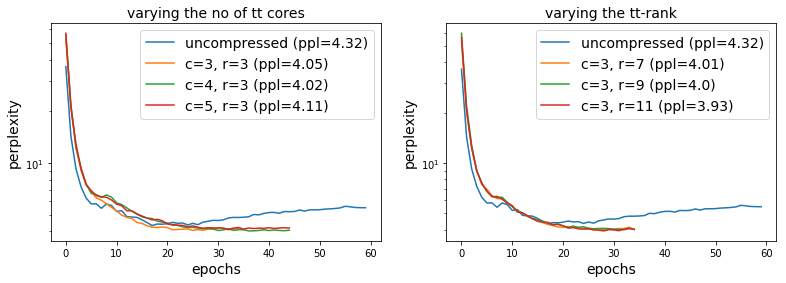

In [69]:
experiments = {
    'core':{
            'files': [f"D:/Users/Charley/Desktop/mo/{exp_id}.valid.log" for exp_id in [2,6,7,8]],
            'labels': ['uncompressed',
                       'c=3, r=3', 
                       'c=4, r=3', 
                       'c=5, r=3']
    },
    'rank':{
            'files': [f"D:/Users/Charley/Desktop/mo/{exp_id}.valid.log" for exp_id in [2,12,13,14]],
            'labels': ['uncompressed',
                       'c=3, r=7', 
                       'c=3, r=9', 
                       'c=3, r=11']
    }
}
print(experiments)
plot_rank_and_cores_experiments(experiments)

## TT-Transformer Results

{'fixed': {'files': ['output/2.valid.log', 'output/501.valid.log'], 'labels': ['transformer', 'tt-transformer']}}
Experiment 2 - best val ppl=4.32
Experiment 501 - best val ppl=4.78


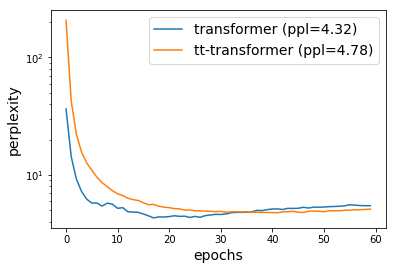

In [65]:
def plot_fixed_rank_and_cores_experiments(exp_data):
    files = exp_data['fixed']['files']
    labels = exp_data['fixed']['labels']
    
    plt.figure(figsize=(6,4))
    for i in range(len(files)):
        exp_file = files[i]
        exp_label = labels[i]
        exp_id = exp_file.split('.')[0][7:]        
        x = pd.read_csv(exp_file)
        best_ppl = round(min(x['ppl']), 2)
        print(f"Experiment {exp_id} - best val ppl={best_ppl}")

        # plot
        plt.plot(x['epoch'], x['ppl'], label=f"{exp_label} (ppl={best_ppl})")
        plt.xlabel('epochs', fontsize=14)
        plt.ylabel('perplexity', fontsize=14)
#         plt.title('varying the no of tt cores', fontsize=14)
        plt.semilogy()
        plt.legend(fontsize=14)   
    plt.show()
    
experiments = {
    'fixed':{
            'files': [f"output/{exp_id}.valid.log" for exp_id in [2,501]],
            'labels': ['transformer', 'tt-transformer']
    }
}
print(experiments)
plot_fixed_rank_and_cores_experiments(experiments)